<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [16]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import pandas as pd

from scipy import stats
from matplotlib import pyplot as plt

sns.set_context("poster")
sns.set(rc={'figure.figsize': (10, 6)})
sns.set_style("whitegrid")

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [4]:
# Read CSV
data = pd.read_csv("C:/Users/peter/Desktop/DOI - Mai/data/Sacramento_transactions.csv")

In [5]:
data.shape

(985, 12)

In [6]:
data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
zip,985.0,95750.697462,85.176072,95603.000000,95660.000000,95762.000000,95828.000000,95864.000000
beds,985.0,2.911675,1.307932,0.000000,2.000000,3.000000,4.000000,8.000000
baths,985.0,1.776650,0.895371,0.000000,1.000000,2.000000,2.000000,5.000000
sq__ft,985.0,1314.916751,853.048243,0.000000,952.000000,1304.000000,1718.000000,5822.000000
price,985.0,234144.263959,138365.839085,1551.000000,145000.000000,213750.000000,300000.000000,884790.000000
latitude,985.0,38.607732,0.145433,38.241514,38.482717,38.626582,38.695589,39.020808
longitude,985.0,-121.355982,0.138278,-121.551704,-121.446127,-121.376220,-121.295778,-120.597599


<AxesSubplot:>

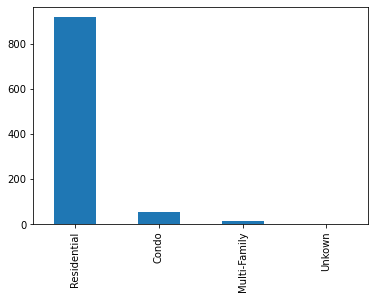

In [9]:
data['type'].value_counts().plot(kind='bar')

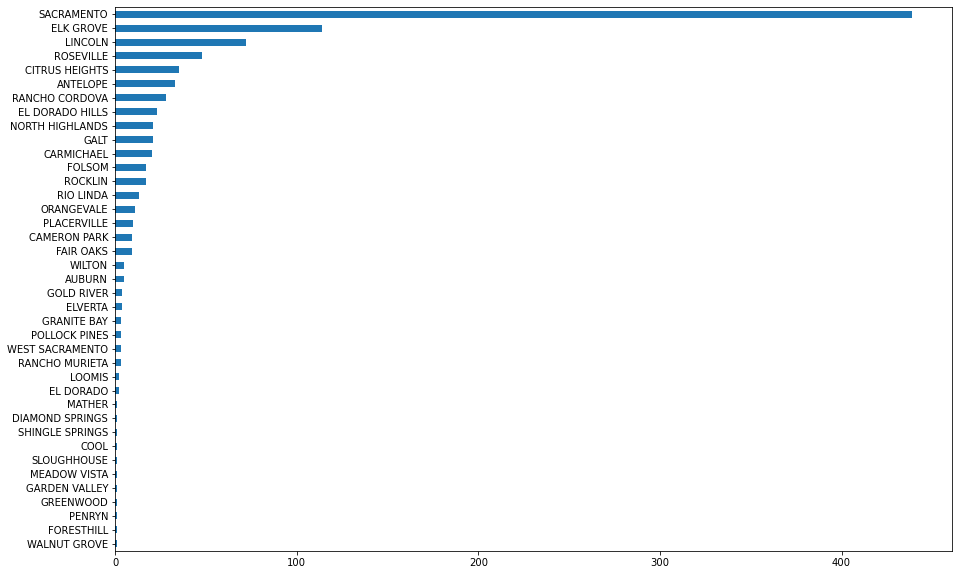

In [10]:
data['city'].value_counts().sort_values().plot(kind='barh', figsize=(15,10));

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

# ANSWER
Price is target varaible.

#### 2.2 List all possible variables which might be Predictor variable.

# ANSWER

beds
baths
sqft
Type

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [11]:
# ANSWER
data.corr()

,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,0.125319,0.069165,0.130108,-0.093353,-0.290389,-0.539904
beds,0.125319,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.069165,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.130108,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,-0.093353,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.290389,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.539904,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


sq_ft is the best predictor because it got strong relationship with beds and baths

#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [12]:
# ANSWER
data['y_hat'] = data['price'].mean()

In [13]:
X = data['sq__ft']
Y = data['price']
Yhat = data['y_hat']

In [14]:
def draw_plot(X, Y, Yhat):
    ### Plot the data
    # create a figure
    fig = plt.figure(figsize=(15,7))
    # get the axis of that figure
    ax = plt.gca()

    # plot a scatter plot on it with our data
    ax.scatter(X, Y, c='b')
    ax.plot(X, Yhat, color='r');

    plt.show();

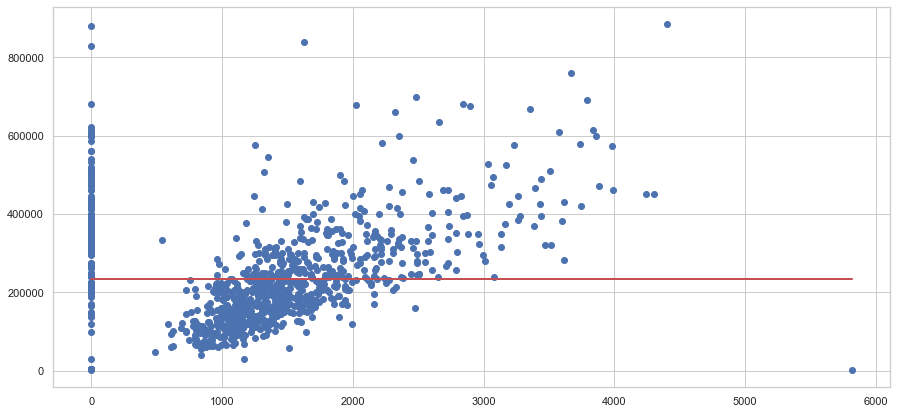

In [17]:
draw_plot(X, Y, Yhat)

#### 2.5 Find Resudals

Find difference between actual value and predicted value. Use absolute value.

In [18]:
# ANSWER
res = abs(data['price'] - data['y_hat']).mean()
res

103452.16956891441

#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable 
- Y = Target Variable

In [19]:
# ANSWER
X = data['sq__ft']
Y = data['price']

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [20]:
# ANSWER
def calculate_beta_1(X, Y):
    Xbar = X.mean()
    Ybar = Y.mean()
    
    n = np.sum((Y - Ybar) * (X - Xbar)) 
    d = np.sum(np.square(X - Xbar)) 
    
    beta_1 = n/d
    
    return beta_1

In [21]:
beta_1 = calculate_beta_1(X, Y)
beta_1

54.158639688530755

##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [22]:
# ANSWER
def calculate_beta_0(X, Y):
    
    Xbar = X.mean()
    Ybar = Y.mean()
    
    beta_0 = Ybar - calculate_beta_1(X, Y) * Xbar
    
    return beta_0

In [23]:
beta_0 = calculate_beta_0(X, Y)
beta_0

162930.16140699777

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [24]:
# ANSWER
def calculate_yhat(x, b0, b1):
    return b0 + b1 * x

In [25]:
Yhat = calculate_yhat(X, beta_0, beta_1)
Yhat

0      208206.784187
1      226133.293924
2      206040.438599
3      209073.322422
4      206094.597239
           ...      
980    286411.859897
981    242922.472227
982    228787.067268
983    254187.469282
984    236694.228663
Name: sq__ft, Length: 985, dtype: float64

##### 2.7.D Find Resudals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [26]:
# ANSWER
def calculate_residual(Y, Yhat):
    res = Y - Yhat
    return res

resi = calculate_residual(Y, Yhat)
abs(resi)

0      148984.784187
1      157921.293924
2      137160.438599
3      139766.322422
4      124194.597239
           ...      
980     53986.859897
981      8922.472227
982      6212.932732
983     18886.469282
984       956.228663
Length: 985, dtype: float64

##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [27]:
# ANSWER
def calculate_total_sum_of_square(Y):
    Ybar = np.mean(Y)
    SStot = np.square(Y - Ybar)
    SStot = np.sum(SStot)
    return SStot

In [28]:
def calculate_residual_sum_of_square(Y, Yhat):
    SSres = np.square(Y - Yhat)
    SSres = np.sum(SSres)
    return SSres

In [29]:
def calculate_r_square(Y, Yhat):
    SStot = calculate_total_sum_of_square(Y)
    SSres = calculate_residual_sum_of_square(Y, Yhat)
    Rsquare = 1 - (SSres/SStot)
    return Rsquare

In [30]:
calculate_r_square(Y, np.mean(Y))

0.0

In [31]:
calculate_r_square(Y, calculate_yhat(X, beta_0, beta_1))

0.11148717682951459

##### 2.7.F [BONUS] Draw Plot of Predicted Line

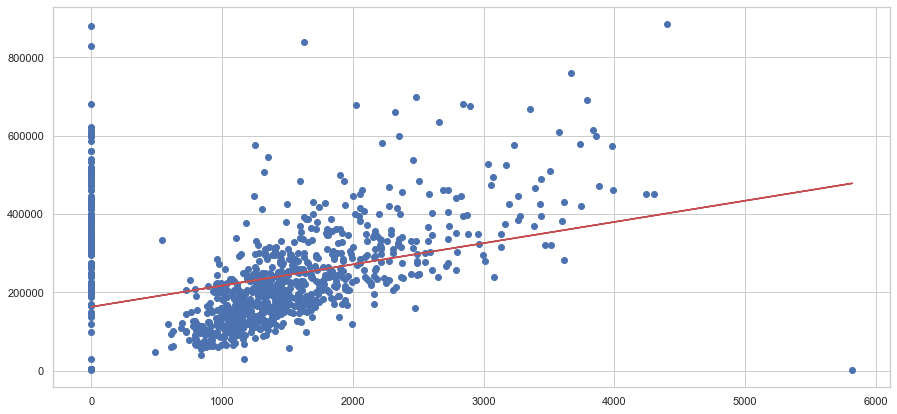

In [32]:
# ANSWER
draw_plot(X, Y, Yhat)

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Resudals

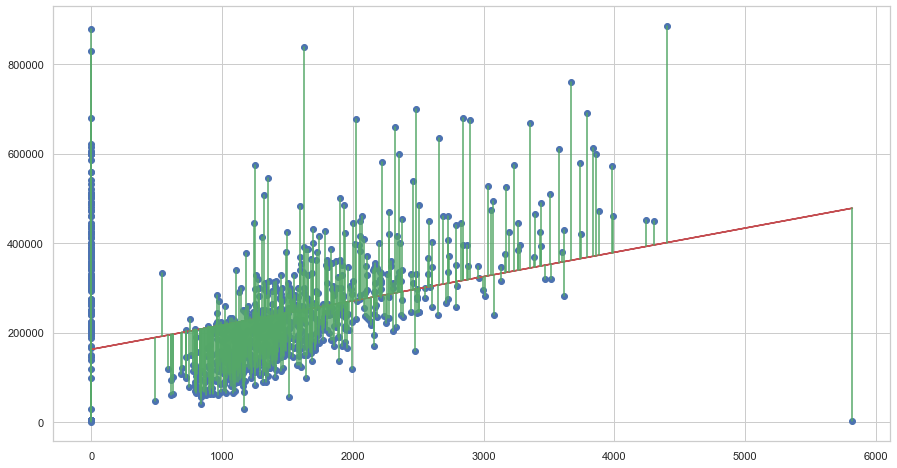

In [33]:
# ANSWER
data['Yhat'] = Yhat

# create a figure
fig = plt.figure(figsize=(15,7))
fig.set_figheight(8)
fig.set_figwidth(15)

# get the axis
ax = fig.gca()

# plot it
ax.scatter(x=X, y=Y, c='b')
ax.plot(X, Yhat, color='r');

# iterate over predictions
for _, row in data.iterrows():
    plt.plot((row['sq__ft'], row['sq__ft']), (row['price'], row['Yhat']), 'g-')

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [34]:
# ANSWER
xpred = 1204
xpred

1204

In [35]:
beta_0

162930.16140699777

In [36]:
beta_1

54.158639688530755

In [37]:
Ypred = beta_1 * xpred + beta_0
Ypred

228137.1635919888



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



